<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

# Michael Toce - Unit 4 - Sprint 1 - Module 1 - Assignment

In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [19]:
import pandas as pd
import spacy
import re
# from spacy.tokenizer import Tokenizer
import matplotlib.pyplot as plt

## STEP 1: CLEAN DATA

In [20]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [21]:
# change star_rating to only be the float of the rating
def clean_rating(col):
    '''
    Removes the extra junk from star rating and makes it a float
    '''
    for i in range(len(col)):
        col[i] = col[i][1:4]
    col = col.astype(float)
    return col

shops['star_rating'] = clean_rating(shops['star_rating'])

In [22]:
def grab_timestamp(text):
    text = text.strip()
    match = re.search('^[0-9]+[/][0-9]+[/][0-9]+', text)
    text = match.group()
    # Turn it into pandas datetimes
    text = pd.to_datetime(text, format='%m/%d/%Y')
    return text

In [23]:
shops['timestamp'] = shops['full_review_text'].apply(grab_timestamp)

shops.head()

,coffee_shop_name,full_review_text,star_rating,timestamp
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03


## STEP 2: TOKENIZE TEXT

In [24]:
def parse(text):
    ''' cleanup and tokenizing function '''
    # remove whitespace
    text = text.strip()
    # remove timestamps
    text = re.sub('^[0-9]+[/][0-9]+[/][0-9]+ ', '', text)
    # remove check-ins
    text = re.sub('^[0-9]+ check-in[s]* ', '', text)
    # remove "Listed in"
    text
    # remove "see photos" endings
    text = re.sub(' See all photos from (.*)$', '', text)
    # leave only letters and numbers
    text = re.sub('[^a-zA-Z 0-9]', '', text)
    # set everything to lowercase and split into tokens
    text = text.lower().split()
    
    return text

In [25]:
shops['tokens'] = shops['full_review_text'].apply(parse)
shops.head()

,coffee_shop_name,full_review_text,star_rating,timestamp,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25,"[love, love, loved, the, atmosphere, every, co..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30,"[listed, in, brunch, spots, i, loved, the, ecl..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03,"[they, are, located, within, the, northcross, ..."


#### Count Most Common Words

In [26]:
from collections import Counter
counts = Counter()

# apply counts function before removing stop words
shops['tokens'].apply(lambda x: counts.update(x))

counts.most_common(10)

[('the', 34760),
 ('and', 26644),
 ('a', 22701),
 ('i', 20232),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10260),
 ('was', 9707),
 ('in', 9546)]

## STEP 3: REMOVE STOP WORDS

In [27]:
# filter out stop words using spacy
## spacy 
nlp = spacy.load("en_core_web_lg")
STOP_WORDS = nlp.Defaults.stop_words

# ## tokenizer
# tokenizer = Tokenizer(nlp.vocab)

def stop_words_filter(tokens):
    '''
    filter out stop words in tokens
    '''
    STOP_WORDS = nlp.Defaults.stop_words
    new_tokens = [x for x in tokens if x not in STOP_WORDS]
    return new_tokens

# use .apply() method to apply to token column
shops['tokens'] = shops['tokens'].apply(stop_words_filter)
shops.head()

,coffee_shop_name,full_review_text,star_rating,timestamp,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25,"[love, love, loved, atmosphere, corner, coffee..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02,"[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30,"[listed, brunch, spots, loved, eclectic, homey..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25,"[cool, decor, good, drinks, nice, seating, ove..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03,"[located, northcross, mall, shopping, center, ..."


#### Count Most Common Words (After Removing Stop Words)

In [28]:
# apply counts function after removing stop words
counts = Counter()

shops['tokens'].apply(lambda x: counts.update(x))

counts.most_common(10)

# save counts to counts_df for future use
counts_df = pd.DataFrame(counts.most_common())
counts_df.columns = ['token', 'count']
counts_sum = sum(counts_df['count'])
counts_df['percent'] = counts_df['count'] / counts_sum

counts_df.head()

,token,count,percent
0,coffee,10260,0.028400
1,place,5426,0.015019
2,good,3973,0.010997
3,great,3919,0.010848
4,like,3088,0.008548


## STEP 4: SPLIT DF into GOOD and BAD Shops

In [29]:
def split_df(df):
    '''
    Splits DF into 2 DFs, one for "good reviews = 4-5", one for "bad reviews = 1-3"
    output: good_reviews, bad_reviews
    '''
    # set a cutoff for star_rating (good shops will be 4-5* and bad shops will be 1-3*)
    cutoff = 3.5

    # create 2 DFs: for good and bad ratings based on CUTOFF
    good_shops = shops[shops['star_rating'] > cutoff]
    bad_shops = shops[shops['star_rating'] < cutoff]

    return good_shops, bad_shops

good_shops, bad_shops = split_df(shops)

In [30]:
# show number of good shops vs. bad shops
print('Number of good shops: ', good_shops.shape[0])
print('Number of bad shops: ', bad_shops.shape[0])

Number of good shops:  6140
Number of bad shops:  1476


In [31]:
good_shops.head()

,coffee_shop_name,full_review_text,star_rating,timestamp,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25,"[love, love, loved, atmosphere, corner, coffee..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02,"[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30,"[listed, brunch, spots, loved, eclectic, homey..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03,"[located, northcross, mall, shopping, center, ..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0,2016-11-20,"[cute, cafe, think, moment, stepped, wasnt, di..."


In [32]:
bad_shops.head()

,coffee_shop_name,full_review_text,star_rating,timestamp,tokens
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25,"[cool, decor, good, drinks, nice, seating, ove..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0,2016-10-25,"[ok, lets, try, approach, pros, music, seating..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0,2016-11-20,"[store, decoration, honestly, coffee, good, co..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0,2016-11-17,"[listed, 2016, time, charm, factory, decor, in..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0,2016-12-02,"[okay, visiting, friends, la, trying, mint, mo..."


## Create DF for Differences between GOOD and BAD Shops

In [33]:
def calculate_percents(good_df, bad_df):
    '''
    Function to get differences between good shops and bad shops
    Input: good_shops_df, bad_shops_df, counts_df
    Output: shop_diff_df
    '''
    # get the counts
    good_counts = Counter()
    bad_counts = Counter()

    good_shops['tokens'].apply(lambda x: good_counts.update(x))
    bad_shops['tokens'].apply(lambda x: bad_counts.update(x))

    # organize into dataframes
    good_counts_df = pd.DataFrame(good_counts.most_common())
    bad_counts_df = pd.DataFrame(bad_counts.most_common())

    # rename columns
    good_counts_df.columns = ['token', 'count']
    bad_counts_df.columns = ['token', 'count']

    # get the percentage values for good_counts
    good_counts_sum = sum(good_counts_df['count'])
    good_counts_df['percent'] = good_counts_df['count'] / good_counts_sum
    
    # get the percentage values for bad_counts
    bad_counts_sum = sum(bad_counts_df['count'])
    bad_counts_df['percent'] = bad_counts_df['count'] / bad_counts_sum
    
    return good_counts_df, bad_counts_df, good_counts_sum, bad_counts_sum

good_counts_df, bad_counts_df, good_counts_sum, bad_counts_sum = calculate_percents(good_shops, bad_shops)

In [34]:
# There is definitely a faster way to do this but at this point I can't be bothered
shop_diffs = []
for token in counts_df['token']:
    goodcount = good_counts_df.loc[good_counts_df['token'] == token]['count']
    if goodcount.empty:
        goodcount = 0
    else:
        goodcount = goodcount.to_list()[0]
    badcount = bad_counts_df.loc[bad_counts_df['token'] == token]['count']
    if badcount.empty:
        badcount = 0
    else:
        badcount = badcount.to_list()[0]
    goodperc = good_counts_df.loc[good_counts_df['token'] == token]['percent']
    if goodperc.empty:
        goodperc = 0
    else:
        goodperc = goodperc.to_list()[0]
    badperc = bad_counts_df.loc[bad_counts_df['token'] == token]['percent']
    if badperc.empty:
        badperc = 0
    else:
        badperc = badperc.to_list()[0]
    shop_diffs.append((token, goodcount - badcount, goodperc - badperc))
    
    # check on how it's running :)
    if token == len(counts_df['token'].to_list()):
        print('end')
    else:
        print(goodcount, badcount)

coffee
place
good
great
like
austin
love
time
im
food
nice
shop
friendly
latte
ive
little
dont
people
delicious
service
pretty
tea
staff
work
best
got
come
seating
try
definitely
drinks
parking
iced
drink
spot
breakfast
atmosphere
order
ordered
sweet
day
small
milk
know
super
lot
espresso
amazing
gelato
want
cream
youre
didnt
think
favorite
cool
area
came
right
cup
inside
music
wifi
outside
perfect
bit
chocolate
menu
hot
tables
way
cute
better
find
awesome
space
tried
sure
location
going
theres
selection
new
went
free
taste
friends
cafe
bar
recommend
places
flavor
cant
morning
tacos
listed
friend
feel
review
cold
local
study
baristas
flavors
chai
plenty
need
2
sit
wasnt
thats
barista
shops
wait
patio
open
thing
chicken
beer
times
options
vibe
brew
enjoy
fresh
kind
ill
house
looking
things
probably
experience
lots
pastries
town
coming
said
5
ice
sandwich
long
stars
night
mocha
big
id
worth
outdoor
counter
different
stop
working
visit
live
table
usually
quality
vanilla
makes
3
away
excel

stayed
austins
1st
wintermoon
mellow
yesterday
suggest
mugs
s
lacking
gonna
self
2016
everyday
complete
willing
notice
syrups
heres
earlier
infused
pass
country
tiramisu
whipped
consider
decaf
salads
private
factory
relatively
fall
eaten
buttery
portions
sides
driving
chatting
picked
aside
class
opted
spice
nearly
particular
pot
coast
computer
knowledgable
online
major
anymore
affordable
pull
realized
servers
holy
rolls
homey
lane
describe
likely
recommendation
eyes
carry
suggestions
roasters
san
st
hipsters
sucks
areas
ginger
mamas
cenote
chess
sadly
jam
biggest
oil
team
shouldnt
pieces
tall
snob
toasted
mug
chain
decorated
caffe
river
wanting
absolute
pleased
important
sour
pulled
standing
crispy
fluffy
burnet
sized
hadnt
layout
presentation
spread
larger
fit
strip
round
calm
cheaper
reasons
visits
mozarts
macaroons
sound
hold
story
mochas
flag
marshmallows
shared
crust
dollar
yay
bother
figured
assortment
accommodating
detail
entrance
blocks
distance
drank
issues
thursday
shows
luck

combine
250
broccoli
written
lately
ha
mi
vodka
grits
tofu
chorizo
omelet
bistro
knock
lastly
approach
olive
greeting
blow
nook
monroe
worthy
settle
mad
everybody
amazed
chipotle
vendors
epic
menus
unfriendly
joy
preferred
bench
root
minus
rushed
reviewers
sunset
test
memorable
socializing
walnut
nose
stronger
drinkers
male
improve
session
terrific
bun
names
according
lie
stock
members
rated
encountered
combined
pink
talked
originally
seconds
contact
exchange
kolache
carmel
men
shout
exploring
america
bummer
ball
flour
plastic
mascarpone
warehouse
hammocks
teriyaki
tapioca
clotted
scallion
desired
penny
rd
allows
appeal
layer
fireplace
winning
blast
cravings
hall
period
puts
wet
overpowering
song
comments
staple
escape
afraid
granted
built
dream
described
dropping
pressure
pet
hearing
cough
row
beats
source
grow
slowly
pounds
grown
promptly
fight
settled
calories
meetup
cat
voice
prepare
freezing
fly
pickmeup
obvious
triple
mueller
feet
earth
mother
lox
apologized
letting
abundance
cor

adventure
native
shortbread
gladly
hotter
12oz
india
crme
pickup
75
catering
washed
sidewalk
todays
sweetheart
warmed
operated
scrumptious
challenging
allergy
modest
tastings
justice
limit
pomegranate
80s
toilet
blind
cleaned
client
blazing
compete
epochs
rid
disappoints
chances
brighter
2pm
undercooked
shocked
guest
tipping
rotate
refund
significantly
instant
guadalupe
clarksville
model
path
latt
failed
sf
residential
biscotti
surface
sent
younger
jelly
send
goal
bfast
kicks
dare
infamous
peppermint
clothes
switch
sumatra
dietary
worlds
mismatched
condescending
worries
preparing
frost
lies
iconic
bullet
365
boyfriends
imported
kerbey
poorly
vinaigrette
makers
ppl
mobile
ricotta
greetings
beets
fusion
attended
homeless
messy
yuck
hersheys
rum
law
granola
acts
papas
canopy
emphasis
olives
empanada
falling
vegetable
heman
ganache
apology
license
broth
caesar
keith
ltf
360
shooting
title
flair
meantime
obnoxiously
sex
ole
increase
media
toe
papers
fork
arrangements
chase
architecture
camp

elephant
complained
carrots
sunrise
conscious
improv
stations
guinness
flexible
baking
umbrellas
yappy
satn
casa
rainey
remake
spam
angie
teepee
sustainable
brisket
hula
cacao
kowabunga
rosedale
buttercream
armstrong
crobrios
lotta
strata
streamlined
checkout
accompanying
format
sacrificing
educational
presentations
overjoyed
passable
bin
kiddy
peoplewatch
midweek
fabulously
balancing
jarring
humongous
rope
inflated
tick
designer
ohhh
fascinating
messing
pushed
tin
hosted
china
swung
staffs
ratings
badly
rushing
fence
drawback
luscious
stuffy
constructive
compost
environments
unnecessary
downsides
sweetest
kiss
scheme
aged
bittersweet
multitude
95
dcor
claustrophobic
chats
feat
smelling
stink
essential
unusually
temperatures
writers
delay
tastefully
tysons
bound
finds
relocated
branding
banter
pumped
nail
tier
nighttime
cleared
drizzled
shy
lakeside
greater
cashiers
irritated
january
socks
department
510
cutesy
wa
dragged
stairs
unlimited
floating
eclairs
lame
culinary
coated
bothering

t
stingy
breakfasts
patikas
storage
masala
dojo
930
contrast
garnished
interviews
roomy
monster
marinated
eggplant
booked
snotty
theatre
roy
disappeared
jackie
performed
showcase
charity
creampuffs
papa
offended
japan
x
chocowhip
lolas
aquarium
fee
radiohead
scalding
baristi
backpacks
london
elaborate
kings
djs
hh
yakitori
anchovy
seaweed
saifa
wallpaper
whilst
lychee
medical
sinks
sales
macs
emergency
chapala
drivethrough
keturah
pee
rory
cheesesteak
inedible
blues
porter
2025
suzy
gjs
reservations
century
canned
onsite
grub
bug
restrictions
edible
karate
thomas
sports
corned
pearbaconscallion
omelettes
bikers
cyclist
jp
pelotas
laura
alta
texican
seton
cro
ribeye
randalls
bagelwich
hooping
monte
cristo
lindsy
instagramworthy
decentnothing
categorize
poart
spruce
oldies
techno
computerized
grop
bartlett
starbuck
matchainfused
mancave
endorses
fines
artsydesign
collaborative
liners
smuckers
confectionary
upcharge
popup
survey
tic
tac
knives
coleslaw
schoolwork
interactionless
pressured

cemetery
overpowered
protect
justin
adjusting
qualified
ilovepuppies
tos
forewarned
mineral
duty
divided
northeast
obtrusive
sustainability
kickass
cuteness
overload
weirdness
snapshot
stinking
privilege
snagging
leaking
saves
nerves
permeates
rockin
breathe
expression
shoulda
loses
slacking
bodies
germaphobe
disposable
standoffish
bam
dilute
treatyoself
backup
stray
adorbs
baristaowner
launch
anticipate
coffeemaking
shines
extravagant
muchneeded
bagged
rewarded
instagrams
scaled
stacked
peacefully
energized
httpzoyaandmecom
buried
textbook
mozart
4stars
berries
doused
fixes
unfamiliar
newcomers
overdone
mindblowing
brutal
taller
pales
oyster
landing
partly
ogling
cancer
unremarkable
controlled
downhill
earns
mouse
ingest
cheer
masses
demographic
pump
beyonce
firmly
woodroasted
reduce
drops
applies
conpanna
rushes
chilantro
frapp
train
ringing
grinding
gripes
seriousness
raker
dodging
yummies
estimate
spun
dire
yearning
valued
tamping
applied
causes
shelving
lifelong
brandon
teacher
ne

carryon
longbut
overruled
gagged
bleghh
marshmellow
edgier
jared
gays
goiiigeous
jetglobal
bearings
false
stopandgo
absurdly
nepotism
pg
elvis
classify
licked
goose
smh
tallboys
postclubpostbar
martinis
buble
ohmygosh
redorange
modified
ensemble
bejeweled
audrey
hepburn
snoop
dogg
stiffer
cosmonaut
bombin
allwhat
supermarket
towelettes
nymeria
laorange
57
mintes
infront
manic
minigrills
hipstermovementhalcyon
clam
nicotine
vices
offtasting
livemusic
fundamentally
twc
halycons
babylol
coffeelover
cecil
lions
1028
investigate
bedish
supplement
abysmal
ingenious
torching
squashing
buyonecoffeeandstayalldayonyourlaptop
expectational
lowcarb
nutellabanana
eggbaconcheddar
unassembled
beams
heats
ads
travelers
1030pm
mallows
messenger
bagsor
backstee
hee
dreamboat
clapped
bookssheesh
silentwhisper
snackmealthing
components
underestimated
dem
bestfriend
frappaccino
successfully
marshmellows
sectioned
heavythe
firsttimer
gimmick
prettytoreally
barcoffeeshop
coffeeshopbar
endofweek
mari
jules
so

toot
ratatouille
modernvenetian
oddities
legalese
literallytranslated
unintelligible
agreeing
soooooooooooo
sicily
luxardo
cherrys
beacon
outings
sustained
antonella
gelatotized
thry
temptation
straciatella
ferrerro
educated
immigrants
hahahahahahaha
65
gelatogreat
experiencedincluding
practiced
oversweet
chocolateamazing
preety
participated
ties
sufficiently
dickhead
homeboy
cupping
orderly
staleness
bussing
onestar
hefty
coffeeloving
unnoticed
docking
sharply
calmer
variance
delivering
rehearsal
peppy
halfheartedly
eternity
rip
cautious
rundown
julep
fastfood
spelled
honda
cappacino
tastey
distinction
cultures
doubts
uncultured
expense
speaker
sugarcream
uppity
pts
amore
periods
valencia
wedged
cappo
sockets
confession
loiter
nuke
mmmmmmmmmmmmmm
luxurious
paneling
hardware
selves
troubles
pedestrians
pep
upandcoming
soninlaw
union
noooo
breather
vision
craigslist
congrats
backdrop
crane
misplaced
womans
excellently
airstream
woodwork
acrid
mustache
chilito
visionary
restored
counting

crannies
geometric
littleee
ceremony
sucking
diego
californian
unimportant
concentrating
winebeer
avant
zoom
sola
100x
coma
hashed
chutney
bec
sprouts
unclear
swarming
martin
fields
battered
int
eaters
fused
echo
warms
lazily
foamed
shopcafe
historic
sangria
crispier
softer
halved
grape
fennel
evokes
prick
slaying
lotion
unapologetic
cauliflower
agian
remodel
fro
twee
offpeak
eased
juju
katz
panhandled
coffeeice
sorrows
festivities
volunteered
billboard
progressed
driskill
abused
carrie
delete
daze
barrestaurant
shaggy
sizing
relayed
rancid
prettily
morn
cheering
gap
joined
souls
snatched
robbery
eve
jamaican
platform
buss
pachon
everchanging
batista
hysterical
unnecessarily
flakey
krispy
outfitters
guad
11th
blossom
madison
stationed
runners
tuesdays
gingery
elegantly
intermediate
lingo
brightened
criticisms
sprinkling
slot
creak
puffed
creampuff
asia
pasadena
dusting
moneys
grizzly
whipping
chinatown
awaits
senses
utter
unwanted
revolving
sandwiched
spite
adzuki
whisker
odds
supremel

recurring
ps2
ps3
farmhouse
bleach
studyinga
comemiddle
newspapermagazine
sidenote
cloths
wholehearted
alabama
megs
nonchalant
northid
mallory
anymoreim
barren
truvia
squishy
luvand
stirrers
cuddleparty
environmentinterior
bias
lattecappuccino
adores
chillier
insidebathrooms
stern
houseturnedcafe
famouscommercializedboth
hightower
wellrun
bitterer
infusedmilk
froot
insteadanyone
expensivethe
accessing
begins
eastview
abilities
accentuated
combining
woodcrafted
ieft
churn
fling
ashtray
immaculately
funnily
kcmo
trapezoid
conjured
gintonic
linstantso
dripped
ohhhh
biodegradable
americanosill
chasing
montreal
mercy
refrain
sandia
bitters
revolution
ownerbarista
icecoffee
shandy
momofuku
pebbles
pedigree
postboozing
smartly
guided
standby
foes
nabbing
iirc
juts
tacospastry
exlovers
relaxthe
soymilk
hades
fantasticespresso
defining
twofer
spro
fazed
coffeelemon
juicebitters
pleaser
constraint
drones
again1
lovelybut
doughnutinfused
ownersbarista
respected
indefinite
fc
wellcrafted
greybeard

butblech
executing
ideafire
yields
ticky
tackies
illustration
develops
destroyed
dispensery
hebrian
layersmooth
websitefacebook
flavorwisethough
cloyingly
darksmoky
sellhow
plunge
anywayi
gooooddoes
mountaintop
fireroasted
goodsfrom
bakermans
bb
selfself
suuuper
commercialized
officebased
purveys
placeno
latta
latteyummmmm
annoys
caddie
santa
sources
trailertruck
personi
woaaaaaaaa
baristasthis
streamers
slats
tiered
gracefully
examine
nudging
piqued
drinkerand
meso
slickercold
creamand
linesufferers
coldish
mhhhh
slicker
enduring
committing
bouncing
uncontrollably
swapped
cinnamonhoney
doingsmall
jointdefinitely
collector
rollin
recognized
hardwarmer
badbut
tastemoreso
reporting
lifeless
brewer
welldressed
bow
reenact
fidelity
dickheads
fantabulous
scotty
flutter
newbs
liepretty
hangup
scroll
eyebrows
dismay
crackso
strangersabouttobe
midcentury
fuggetaboutit
normalsized
bak
mediocrity
consent
deters
upsides
seep
glassesmustaches
chocolateflavored
441
staking
butits
brooklynite
moonsh

hormone
chococraving
mixedused
developments
establishing
bookcase
espressofoam
barber
postdinner
sniffed
momentand
cortadito
kelsey
renee
bitting
baskin
robbins
soyalmond
powders
dfw
ur
qualms
brentwood
lung
retreating
shortish
dreadlocks
ignores
10202016
infatuation
countercurrent
workinghardwithmycoffee
reflection
joenow
por
werid
interestingvintage
sootherwise
coolchill
tablesseats
peeves
tablescouchesoutside
getaway
thinglol
34am
dayit
lotmaybe
notmaybe
shrine
sean
laughingits
bath
fridges
courtesytheyre
workingi
moco
hippe
texass
hipsteresque
garth
brooks
untrue
robotic
saccharine
douchebags
immeasurably
coffeepizza
familyfriends
230am
implied
presweetened
smoothcreamy
maiden
ofgaspartificial
nonartificial
portugesethats
meantbrazil
portugesegood
associates
invites
pounce
spy
packing
suspicion
affirm
chocolateeventually
coffeefrom
shopever
coulda
complaied
broyou
succccchhh
espreesso
notgreat
inhabited
strongsignal
goodie
710which
greatand
graveyard
devon
operations
taxes
smurfs
i

dueling
marzoccos
sacramento
foodsnackdrink
amped
524
flighpath
configurations
cooling
strep
bu
flightpaths
brow
forehead
coffeesnobhoneys
carpenter
extending
notsoportable
selfishly
zoning
notsolittle
kats
studyingfriendly
foyer
impresses
cds
backing
outerspace
bodysized
windowwall
mindblowed
reps
na
fuzzies
fourtop
stayandwork
unspoken
whit
demands
rn
pangs
pizzabut
737
bergstom
somedays
committedowner
teh
buttttt
50cents
unaustin
nightplace
gamethen
noiselevel
blaringly
inherently
staffgreat
spaceample
snacksa
brotherscan
reallllly
condesa
expectantly
equality
loosened
hastily
tool
engorge
exams
gestures
spaceyou
georgia
affordability
whimsy
loosen
aggravate
americanotopo
goodish
differentiates
exponentially
tablescouches
sizzle
dogshit
timbaland
downtempo
progrock
inoffensive
fastpaced
rhythmic
reign
dancey
curseladen
courage
edm
unskilled
hovel
bombard
pl0x
terrorism
gobs
munchy
inverse
introverts
nil
extroverted
persuasion
talkingsocializinghanging
outwhatever
cannedbottled
awake

bruxie
bomberdont
mochay
gagging
tendrink
sevenday
austinthat
drinkercreator
averageunremarkable
yessss
nommm
pequeno
openair
tacodelitheir
barbeque
saucesweet
tangand
milagros
shopwho
evened
grackle
patiolove
buster
impressedespecially
defer
verbosity
succinct
americas
ops
amalgamation
lighters
tennis
brainstorm
antistarbucks
3star
exorbitant
coveted
conenot
snapshots
evar
highlighting
ambiiiaaaaaance
bonding
michelada
nestle
streetart
foursquare
wowthis
premixed
goood
peppery
crude
naturale
instafamous
basicb
tacosmini
irritable
preferential
natives
observing
bleeding
rudys
diabetics
jennifer
coverup
mildlyflavored
exited
spearmint
parsnip
oppurnuoty
coldhot
teenyboppers
hispters
ehhhok
weirdtasting
goesid
milkits
photoop
poses
pulse
orlando
victims
meaningful
snake
lurks
floorboards
hamsters
rainstorm
kickoff
wintermint
smoooooth
ughhh
reallyyyy
makeorbreak
fore
encompass
drunken
trumpclinton
rhino
hostcashier
taters
wtax
utdwntwn
17th
pinnacle
benedicts
daddy
sly
workx
coffeesoda
d

coffeelove
rollsthank
anymorei
everydaylove
selectionlove
abbreviated
hungrylove
rolli
rachael
invigorated
exploratory
dialogue
engineered
themso
theynathan
middleton
fking
umare
mutual
tasked
arduous
fateful
drifted
discrete
contained
grapevine
undoubtedly
shittastic
perky
vanity
vamp
tote
president
obamas
pilfered
trapper
keeper
highschooler
muchand
allabout
quivering
25year
billionaires
wooing
clumsy
audis
handcuffing
penthouse
stupidest
supposing
condom
screamed
sorority
poodles
outburst
literary
outrage
ordeal
reoccurred
shopthat
associate
delving
mommyporn
sm
schlock
contort
deepest
clench
houstonbased
circled
somethins
unrestricted
servicedriven
mbs
piggybacked
yemen
replenishing
uberpolishing
brushes
unnamed
sloooowest
scram
workouts
lohan
lscl
explains
drill
sideburns
rovers
staffing
dominate
lolacoffeecomabout
investors
booo
favours
cardboard
losers
goofballs
pissy
phish
zuzu
goooooood
gooooooooooood
btacos
loungebut
aired
fussy
catalina
10000
hohum
bicyclist
2xweek
annex
bre

cmmon
stopover
exemplar
fellinis
satyricon
anglophiles
guns
parliament
slather
frosted
virginia
woolf
churchill
erudite
trolley
4legged
bomg
mochalife
ohand
highlightlatt
andrew
earthiness
trimmed
cube
unbeknown
phds
repast
cashiersbaristas
preregistration
partnered
530am
daywinner
mochayou
pricer
dumber
largely
investigation
superfantastic
strainer
indieart
cinema
validate
lyin
pasties
contributer
bittersweetmy
diggity
taping
gljust
notsobusy
attentiveness
oblige
circular
hangingout
lpt
hooha
mocchiato
schmoozing
spits
sumpin
puns
cockadoodledoo
castillo
teadrinker
hipstertastic
eyesight
mistakenly
wishand
emos
matcos
backgrounds
politicians
sexting
liquids
foodbut
saloonso
countryish
antelope
wentworked
raging
dranks
spiking
ridgeback
nitpicking
confuse
exudes
whiz
eveninglate
discerning
flippy
sideeye
somewehre
cuss
audism
accomplishes
austinwhere
sensivity
sokind
1977
tabs
alleged
seldom
discrimination
shrugged
appalachian
lumberjacks
adorned
thor
restroomsnot
yucko
blech
stunk
slu

nitrocoffee
redefining
lent
boon
speculated
logical
yielding
unlikely
explosive
gravity
animo
salud
painint
whike
nicenot
christine
libby
standpoint
unappreciative
backedup
queue
yelped
suppliers
coldpretentoius
102814
giggles
plop
professionally
behaving
drinkeat
initiate
ocaa
alanna
js
ayesha
12ozwith
okayy
minority
mckim
brewerys
cuberow
poptarts
timed
canning
akward
irl
seclude
fizzy
pompous
groove
blacklisted
cultivate
relations
easiness
watchinghabit
sync
distorted
unneeded
flea
halfs
evaaaa
habiscus
loathe
remedied
shizz
happenings
happenedi
nickelback
elected
whyyyyyyy
loafers
sippables
stereos
nextdoor
equals
bluf
whitemanchaca
veracrus
rhyme
dodgy
hurdle
sailing
capucino
diasappointed
trendbraids
loudest
eardrums
reheating
poisoned
concerts
systemic
enabling
fs
outchill
neckbeard
grasswith
benigno
hereit
198
coyote
contests
delicioso
cozumel
healthful
dales
turf
classiest
notworthit
quirk
bankers
overuse
myfi
principles
bwah
maniacal
impersonation
radios
shiner
shillings
work

autoshop
junkyard
9pm12am
reviewat
selfimportant
punctilio
cardage
wasalright
itsuncomfortably
fruitlessly
gooda
surgically
peple
placenot
mourn
cooffe
chitchatting
phobic
stressfree
donebut
frumpy
hoppy
goodseverything
residentials
ministage
comfortablelooking
fillingly
comparision
sno
unproductive
compact
beaconing
christmastime
exposure
booster
gradschoolbinders
bunk
inconsisent
atmoshpere
tazzas
nonsilent
nonloud
studyread
afternoonsearly
colin
probablynotweirdincident
imgonnagetmugged
charmingly
unintrusive
jaw
escorted
threatened
altercation
hotfruityherbaltea
claiming
preached
believers
spanakopita
fridayi
indiecoffeeshopwithartforsaleeverywhere
moredifferent
unmanageable
amass
personalities
cheapdirty
groping
zino
loudspeakers
punkindie
goop
renooh
geewhiskers
pinkhaired
hintocinnamon
threat
expletives
certified
underseasoned
payed
825
institutionyou
uttering
remained
uttered
buttons
bustub
juicer
decorambiance
nicethus
wholeheartedly
neeting
blehhappy
ramekin
uncrowded
wellfla

routes
legs
douches
1996
tdfs
ballsy
jewels
takeoff
maillot
jeune
allstar
butteryrich
proliferation
dona
doglovers
bistros
nuptials
distributed
roaming
economist
freakishly
omnipresent
unsung
tenth
postaldiscovery
tdf
tan
sprint
whup
testicular
blevel
oppressiveness
gothis
conferencing
shopped
questionable
wether
jogging
disgraceful
islaps
directing
michelin
overused
summeri
virtue
backdare
hippievibeestablishment
edibles
drinkables
fluffed
dictionary
nightand
biggiewas
sewerage
sheep
manure
septic
controls
malodorous
border
alcoholism
equidistant
ladybird
lull
cheeseboard
travelling
keepers
placethe
therejust
steamy
feces
yesthats
relegates
unmaintained
codeviolating
unwashed
sryahcab
lbj
sillyunfair
servicesmall
codeprotected
boardwalka
cashiercounter
rivers
fighter
fights
paddling
kayaks
eliminate
obscenely
exceptions
minx
lakesunset
henris
fantasies
sauv
ro
toned
sincity
endorphin
brewskie
meteredstreet
parkingyou
bridge
boating
prepares
moisti
spalike
counterhe
contracted
workerma

nerdcore
multiplayer
3ds
viable
growling
restaurantbar
howto
doods
intentioned
lightingits
volcano
duchesse
gameloving
superman
superhero
trudys
pt
fluorescent
firsthand
wizards
ofthe
xfiles
plainjane
sherlocks
offthenorm
ding
creeping
munchkin
lords
waterdeep
ramen
abv
bagpipe
ecigarette
carcinogen
succeeds
budmilleretc
ramping
poker
tuned
isare
dampening
shelfs
shoppe
dressings
relishes
scrape
smacks
arcadepubgames
outback
steakhouse
boardgamegeeks
toasting
underordering
goesthe
margin
hydrogenated
fructose
premom
imagining
uninitiated
miraculous
clippers
wgreen
sixer
chocolatemmm
suuuuuperfriendly
cigs
beanitos
icehaus
omgoshit
beersamazing
7eleven
toiletries
deodorant
patchouli
colocating
swore
baconalso
pepsi
evidenced
bison
quail
menagerie
jones
clancy
foodthe
footlong
magnitude
soapscandles
snackmealbevie
imaginable
betcha
sirree
drool
approve
snackies
healthyish
oddity
inthats
worldly
jerky
rammstein
stevie
snacksdrinksfood
differentiate
cornerstores
flava
bffs
rising
awesomei


In [35]:
shop_diffs_df = pd.DataFrame(shop_diffs)

shop_diffs_df.columns = ['token','count_difference','rel_freq_diff']

shop_diffs_df = shop_diffs_df.sort_values(by='rel_freq_diff', ascending=False)

shop_diffs_df.head(10)

,token,count_difference,rel_freq_diff
3,great,2987,0.006474
18,delicious,1226,0.003577
6,love,1515,0.003518
5,austin,1682,0.003462
24,best,1102,0.003065
0,coffee,6048,0.002747
12,friendly,1265,0.002745
47,amazing,732,0.002168
64,perfect,656,0.001960
54,favorite,671,0.001915


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


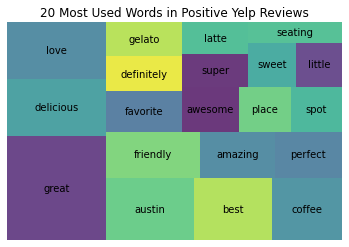

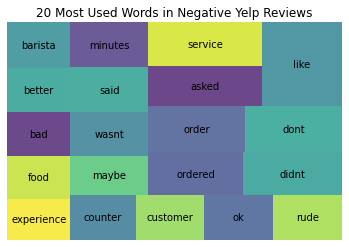

In [36]:
# some vizualizations
import squarify
import matplotlib.pyplot as plt
%matplotlib inline

top_10 = shop_diffs_df.head(20).copy()
bottom_10 = shop_diffs_df.tail(20).copy()

# top 20 plot (ignore the name, I changed it after)
squarify.plot(sizes=top_10['rel_freq_diff'], label=top_10['token'], alpha=.8)
plt.title('20 Most Used Words in Positive Yelp Reviews')
plt.axis('off')
plt.show()

squarify.plot(sizes=bottom_10['rel_freq_diff'], label=bottom_10['token'], alpha=.8)
plt.title('20 Most Used Words in Negative Yelp Reviews')
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

